# Thermal Radiation Lab 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Steps 11 and 12

In [34]:
black_face = np.array([18.8, 18.8, 18.6, 18.7, 18.5]) # these four arrays store voltage measurements in millivolts
mirror_face = np.array([0.9, 1.0, 0.9, 0.9, 0.9])
silver_face = np.array([5.5, 5.6, 5.5, 5.5, 5.5])
white_face = np.array([17.3, 17.2, 17.9, 17.8, 17.7])

four_faces_mV = np.vstack((black_face, mirror_face, silver_face, white_face))
four_faces_mV_uncertainty = np.std(four_faces_mV, axis = 1)

cube_equilib_resistance = 4.3 # kilo-Ohm's
cube_equilib_temp = 108 # celisius. determined using table in lab manual

def stef_bolt(epsilon, sigma, temp):
    '''epsilon is emissivity, sigma is stefan-boltzmann constant. this function returns power per unit area'''
    return epsilon * sigma * temp**4
four_faces_mV_uncertainty

array([0.11661904, 0.04      , 0.04      , 0.27856777])

### Analysis Question 2

In [35]:
calibration = 50 # each mV measured on the radiation sensor corresponds to 50 Watts per meter squared
STEF_BOLTZ_CONST = 5.67e-8 # units of Watts / (meter ^ 2 * Kelvin ^ 4)
four_faces_avg = np.average(four_faces_mV, axis = 1) # units of millivolts
four_faces_power = four_faces_avg * calibration # units of Watts per meter squared
emissivity = four_faces_power / (STEF_BOLTZ_CONST * cube_equilib_temp**4) # these quantities are dimensionless (unitless)

In [36]:
uncert_emissivity = (1/(STEF_BOLTZ_CONST * cube_equilib_temp**4)) * 50 * four_faces_mV_uncertainty

In [120]:
# all of the temperature values in this array are the same, which shows that our data analysis is correct so far
testing_temp = (four_faces_power / (emissivity * STEF_BOLTZ_CONST))**0.25 
emissivity, uncert_emissivity

(array([121.07899162,   5.96320515,  35.77923093, 113.94907242]),
 array([0.75589483, 0.25926979, 0.25926979, 1.80560515]))

### Analysis Inverse Square Law

In [60]:
distance = np.array([4,6,8,10,12,15,20,25,30,35,40,50,60,80]) # distance in cm of the radiation sensor from the S-B bulb
radiation_level_mV = np.vstack(([32.4,31.9,33.6],[15.9,15.8,15.5],[8.4,8.3,8.4],[5.3,4.9,5.6],[3.9,3.8,3.8],
                                [2.4,2.2,2.4],[1.3,1.2,1.4],[0.8,0.8,0.8],[0.5,0.5,0.5],[0.3,0.4,0.3],[0.2,0.2,0.2],
                                [0.1,0.1,0.1],[0.1,0,0.1],[0,0,0])) # units of mV
avg_radiation_lvl_mV = np.mean(radiation_level_mV, axis = 1) - (-1) # units of mV. subtracting 1 mV because that is background lvl 
average_radiation_lvl_err = (3*(0.33**2)*(0.05*2))**0.5 # this is error due to lack of precision of voltmeter
avg_radiation_lvl_mV_err = ((np.std(radiation_level_mV, axis = 1))**2 + (average_radiation_lvl_err**2))**0.5 # Add the error in x to this
# Now we will account for the error in the distance measurments
avg_radiation_lvl_mV

array([33.63333333, 16.73333333,  9.36666667,  6.26666667,  4.83333333,
        3.33333333,  2.3       ,  1.8       ,  1.5       ,  1.33333333,
        1.2       ,  1.1       ,  1.06666667,  1.        ])

In [121]:
avg_radiation_lvl_mV_err

array([0.73590685, 0.24811064, 0.1867946 , 0.33895755, 0.1867946 ,
       0.20385997, 0.19833473, 0.18074844, 0.18074844, 0.1867946 ,
       0.18074844, 0.18074844, 0.1867946 , 0.18074844])

### Plotting Radiation Level vs. Distance

Text(0.5, 0.98, 'radiation level vs distance')

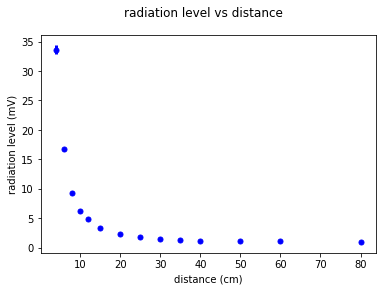

In [61]:
plt.errorbar(distance, avg_radiation_lvl_mV, yerr = avg_radiation_lvl_mV_err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel('distance (cm)')
plt.ylabel('radiation level (mV)')
plt.suptitle("radiation level vs distance")

### Plotting log-log data

In [62]:
# plt.plot(np.log(distance), np.log(avg_radiation_lvl_mV), 'ro')
# plt.xlabel('log(distance)')
# plt.ylabel('log(radiation level)')
# avg_radiation_lvl_mV, distance

### Determining coefficients for log-log regression

In [63]:
x = np.log(distance)
y = np.log(avg_radiation_lvl_mV)
err_y = np.log(avg_radiation_lvl_mV_err)

delta = sum(1/err_y**2) * sum(x**2/err_y**2) - (sum(x/err_y**2))**2
m = (sum(1/err_y**2) * sum(x*y/err_y**2) - sum(x/err_y**2) * sum(y/err_y**2)) / delta
b = (sum(x**2/err_y**2) * sum(y/err_y**2) - sum(x/err_y**2) * sum(x*y/err_y**2)) / delta

errm = math.sqrt(sum(1/err_y**2) / delta)
errb = math.sqrt(sum(x**2/err_y**2) / delta)
fittemp = m*(x) + b

#calculating chi-squared
deg_of_freedom = 12
chisq = sum((y - fittemp)**2/err_y**2)
reduced_chisq = chisq / deg_of_freedom

['fit slope = -1.409 ± 0.284',
 'fit intercept = 5.414 ± 0.6',
 'Chi-squared: 0.63',
 'Reduced Chi-squared: 0.05']

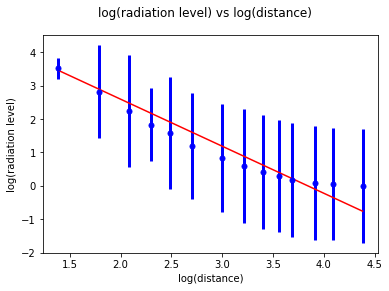

In [64]:
plt.errorbar(x, y, yerr = err_y, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel('log(distance)')
plt.ylabel('log(radiation level)')
plt.suptitle("log(radiation level) vs log(distance)")

plt.plot(x, m * x + b, 'r') # Plotting line of best fit
plt.savefig('log-log-regression.png')

m_rounded = str(round(float(m), 3))
merr_rounded = str(round(float(errm), 3))
b_rounded = str(round(float(b), 3))
berr_rounded = str(round(float(errb), 3))
chisq_rounded = str(round(float(chisq), 2))
reduced_chisq_rounded = str(round(float(reduced_chisq), 2))

uncertainties = ["fit slope = " + m_rounded + u" \u00B1 " + merr_rounded,
"fit intercept = " + b_rounded + u" \u00B1 " + berr_rounded,
"Chi-squared: " + str(chisq_rounded),
"Reduced Chi-squared: " + str(reduced_chisq_rounded)]
uncertainties

### Analysis - Plotting Radiation Level vs. Filament Temperature

In [109]:
background_radiation = (0 + (-.04)) / 2

# filament_current = np.array([.81,.83,.81],[.98,.98,.98],[1.12,1.12,1.12],[1.25,1.25,1.25],[1.37,1.37,1.37])

radiation_lvl_mV = [[.28,.63,.79],[.82,1,1.08],[1.58,1.66,1.71],[2.47,2.52,2.55],[3.53,3.54,3.56],[4.74,4.73,4.72],
                    [6.07,6.02,5.98],[6.92,6.9,6.69],[7.6,7.49,7.42],[8.98,8.98,8.93]]
radiation_lvl_mV_avg = np.mean(radiation_lvl_mV, axis=1) - background_radiation
radiation_lvl_mV_avg_err = (3*(.005**2)*(.33**2))**0.5 # error due to precision limitation of voltmeter
radiation_lvl_mV_avg_err = ((np.std(radiation_lvl_mV, axis = 1))**2 + (radiation_lvl_mV_avg_err**2))**0.5

### Determining Filament Temperature Using Voltage and Current Measurments

In [110]:
filament_voltage_mV = np.array([2.00,3.00,4.00,5.00,6.00,7.00,8.00,8.50,9.00,10.00]) # THESE VALUES SHOULD BE UPDATED WITH MORE PRECISE ONES SENT BY ALEX
filament_current = np.array([.81,.98,1.12,1.25,1.37,1.48,1.59,1.64,1.69,1.79]) # units of amperes
current_err = .005 # amperes
volt_err = .005 # mV


In [111]:
R_ref = 1.03 # units of ohm's I AM NOT SURE IF THIS VALUE IS CORRECT! I MUST DOUBLE CHECK WITH ALEX
filament_resistance = filament_voltage_mV / filament_current # units of milliohm's
resistance_err = ((volt_err**2 + (filament_resistance**2)*current_err**2)**0.5)/filament_current # error in resistance
relative_resistance = filament_resistance / R_ref
relative_resistance_err = (1 / R_ref)*(resistance_err)
# USE TABLE IN LAB MANUAL TO DETERMINE FILAMENT TEMPERATURE
relative_resistance

array([2.39721923, 2.97206261, 3.46740638, 3.88349515, 4.25200198,
       4.59197061, 4.88489955, 5.0319678 , 5.17033377, 5.4238759 ])

In [122]:
relative_resistance_err 

array([0.01596518, 0.01595214, 0.01607484, 0.01601206, 0.01591765,
       0.01585636, 0.01566178, 0.01562431, 0.0155642 , 0.0153913 ])

### Fitting data to table of temperature versus resistivity for tungsten

In [112]:
x = np.array([300,600,1000,1700,2000,2200,2900,3200]) # units of kelvin
y = np.array([1,2.34,4.41,8.28,10.03,11.24,15.63,17.62]) # unitless. random values chosen from the table in manual

std_x = (((np.std(x) ** 2) * len(x)) / (len(x) - 1))**0.5 # std_mV is the sample standard deviation
std_y = (((np.std(y) ** 2) * len(y)) / (len(y) - 1))**0.5 # std_Kelvin is the sample standard deviation

x_mean = np.mean(x) # x mean
y_mean = np.mean(y) # y mean

r = sum((x - x_mean) * (y - y_mean)) / (np.sqrt(sum((x - x_mean) ** 2) * sum((y - y_mean) ** 2)))  

m = r * (std_y / std_x)
b = y_mean - (m * x_mean)

m = 0.005744212925280809
b = -1.1618199576754051
This line of best fit is used to convert from relative resistivity to Kelvin


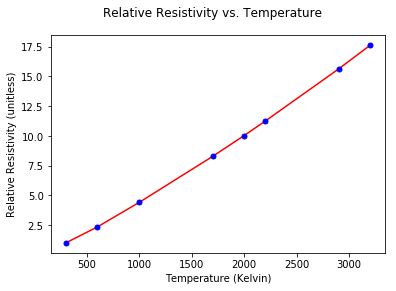

In [113]:
plt.errorbar(x, y, yerr = 0, fmt = "bo", markersize = "5", linewidth=3)
# x = np.linspace(-1, 8, 10)
# y = m*x + b
plt.plot(x, y, 'r') # Plotting line of best fit
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Relative Resistivity (unitless)')
plt.suptitle('Relative Resistivity vs. Temperature')
# plt.savefig('temp_vs_resistivity.png')
print('m = ' + str(m) + '\nb = ' + str(b) + '\nThis line of best fit is used to convert from relative resistivity to Kelvin')

In [114]:
def resitance_to_temperature(relative_resistivity, m, b):
    '''takes the relative_resistivity, slope, and y-intercept, and returns the filament temperature, 
    in Kelvin, corresponding to the given relative resistivity'''
    return (relative_resistivity - b) / m

In [115]:
filament_temperature = [(relative_resistance[i], resitance_to_temperature(relative_resistance[i], m, b)) for i in range(0, relative_resistance.size)]
filament_temperature = np.array(filament_temperature) # contains rows of the following form [relative resistance, temperature]
filament_temperature_err = m * relative_resistance_err 
filament_temperature, filament_temperature_err

(array([[   2.39721923,  619.58691812],
        [   2.97206261,  719.66039959],
        [   3.46740638,  805.8939315 ],
        [   3.88349515,  878.3300983 ],
        [   4.25200198,  942.4828105 ],
        [   4.59197061, 1001.66735529],
        [   4.88489955, 1052.66284356],
        [   5.0319678 , 1078.26569691],
        [   5.17033377, 1102.35358853],
        [   5.4238759 , 1146.49229495]]),
 array([9.17074085e-05, 9.16325026e-05, 9.23373050e-05, 9.19766859e-05,
        9.14343515e-05, 9.10823318e-05, 8.99645933e-05, 8.97493473e-05,
        8.94040577e-05, 8.84108820e-05]))

In [116]:
# plt.plot(filament_temperature[:, 1], filament_temperature[:, 0], 'o')
# plt.xlabel('filament_temperature (Kelvin)')
# plt.ylabel('radiation_level (mV)')
# filament_temperature[:, 0] # THIS GRAPH SHOULDN'T BE PERFECTLY LINEAR BUT IT IS BECAUSE OF THE INTERPOLATION METHOD USED 

array([0.21298761, 0.1087676 , 0.05361748, 0.03312184, 0.01279543,
       0.00865067, 0.03692862, 0.10406916, 0.07414214, 0.02374285])

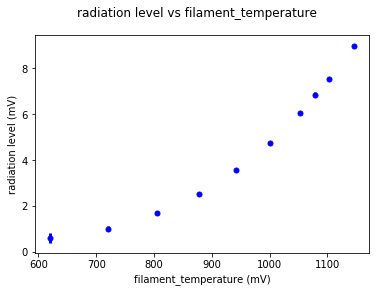

In [117]:
x = filament_temperature[:, 1]
y = radiation_lvl_mV_avg
err_y = radiation_lvl_mV_avg_err # error in filament temperature is not included because it is negligible

plt.errorbar(x, y, yerr = err_y, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel('filament_temperature (mV)')
plt.ylabel('radiation level (mV)')
plt.suptitle("radiation level vs filament_temperature")
radiation_lvl_mV_avg_err

['fit slope = 4.473 ± 3.523',
 'fit intercept = -29.344 ± 23.701',
 'Chi-squared: 0.0',
 'Reduced Chi-squared: 0.0']

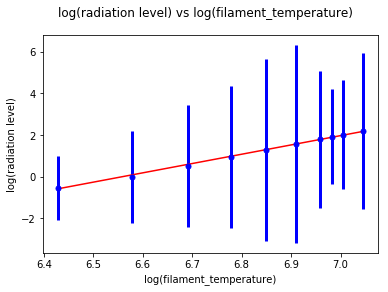

In [118]:
x = np.log(filament_temperature[:, 1])
y = np.log(radiation_lvl_mV_avg)
err_y = np.log(radiation_lvl_mV_avg_err) # (1 / radiation_lvl_mV_avg_err) * err_in_the_error ?

delta = sum(1/err_y**2) * sum(x**2/err_y**2) - (sum(x/err_y**2))**2
m = (sum(1/err_y**2) * sum(x*y/err_y**2) - sum(x/err_y**2) * sum(y/err_y**2)) / delta
b = (sum(x**2/err_y**2) * sum(y/err_y**2) - sum(x/err_y**2) * sum(x*y/err_y**2)) / delta

errm = math.sqrt(sum(1/err_y**2) / delta)
errb = math.sqrt(sum(x**2/err_y**2) / delta)
fittemp = m*(x) + b

#calculating chi-squared
deg_of_freedom = 8
chisq = sum((y - fittemp)**2/err_y**2)
reduced_chisq = chisq / deg_of_freedom

plt.errorbar(x, y, yerr = err_y, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel('log(filament_temperature)')
plt.ylabel('log(radiation level)')
plt.suptitle("log(radiation level) vs log(filament_temperature)")

plt.plot(x, m * x + b, 'r') # Plotting line of best fit
plt.savefig('log-log-regression.png')

m_rounded = str(round(float(m), 3))
merr_rounded = str(round(float(errm), 3))
b_rounded = str(round(float(b), 3))
berr_rounded = str(round(float(errb), 3))
chisq_rounded = str(round(float(chisq), 2))
reduced_chisq_rounded = str(round(float(reduced_chisq), 2))

uncertainties = ["fit slope = " + m_rounded + u" \u00B1 " + merr_rounded,
"fit intercept = " + b_rounded + u" \u00B1 " + berr_rounded,
"Chi-squared: " + str(chisq_rounded),
"Reduced Chi-squared: " + str(reduced_chisq_rounded)]
uncertainties
# THIS GRAPH IS LINEAR WHICH IS A HUGE PROBLEM. IT MAKES MY DATA ANALYSIS LOOK SILLY BECAUSE I HAVE A PERFECT FIT

In [119]:
err_y

array([-1.54652127, -2.21854183, -2.92588014, -3.40756235, -4.35866712,
       -4.750118  , -3.29876839, -2.26269962, -2.60177127, -3.74047373])

In [ ]:
#The errors in radiation level are very small, but when 